In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [12]:
# 1. Load Data
print("=== Loading Preprocessed Data ===")
df = pd.read_csv('../data/processed/processed_stroke_data.csv')
print("Shape awal dataset:", df.shape)



=== Loading Preprocessed Data ===
Shape awal dataset: (1458, 18)


In [13]:
# 2. Advanced Feature Creation
print("\n=== Creating Enhanced Features ===")

# 2.1 BMI Category dengan threshold yang lebih detail
def get_bmi_category(bmi):
    if bmi < -2:
        return 0  # Severely Underweight
    elif bmi < -1:
        return 1  # Underweight
    elif bmi < 0:
        return 2  # Normal (lower)
    elif bmi < 1:
        return 3  # Normal (upper)
    elif bmi < 2:
        return 4  # Overweight
    else:
        return 5  # Obese

# 2.2 Age Groups dengan pembagian yang lebih detail
def get_age_group(age):
    if age < -1.5:
        return 0  # Very Young
    elif age < -0.5:
        return 1  # Young
    elif age < 0.5:
        return 2  # Middle Age
    elif age < 1.5:
        return 3  # Senior
    else:
        return 4  # Elderly

# 2.3 Glucose Level Category dengan threshold medis
def get_glucose_category(glucose):
    if glucose < -1.5:
        return 0  # Normal
    elif glucose < 0:
        return 1  # Pre-diabetes
    elif glucose < 1.5:
        return 2  # Diabetes
    else:
        return 3  # Severe Diabetes

# Aplikasikan kategori baru
df['bmi_category'] = df['bmi'].apply(get_bmi_category)
df['age_group'] = df['age'].apply(get_age_group)
df['glucose_category'] = df['avg_glucose_level'].apply(get_glucose_category)

# 2.4 Enhanced Risk Factors
df['risk_factors'] = (
    df['hypertension'] * 2 +  # Double weight for hypertension
    df['heart_disease'] * 2 +  # Double weight for heart disease
    (df['bmi_category'] >= 4).astype(int) +  # Overweight/Obese
    (df['glucose_category'] >= 2).astype(int) +  # Diabetes
    (df['age_group'] >= 3).astype(int)  # Senior/Elderly
)

# 2.5 Complex Interactions
df['age_health_interaction'] = df['age'] * (df['hypertension'] + df['heart_disease'])
df['bmi_glucose_risk'] = df['bmi'] * df['avg_glucose_level'] * df['risk_factors']
df['age_lifestyle_risk'] = df['age'] * df['risk_factors'] * (df['smoking_status_smokes'].astype(int))

print("Enhanced features created successfully")


=== Creating Enhanced Features ===
Enhanced features created successfully



=== Advanced Feature Analysis ===


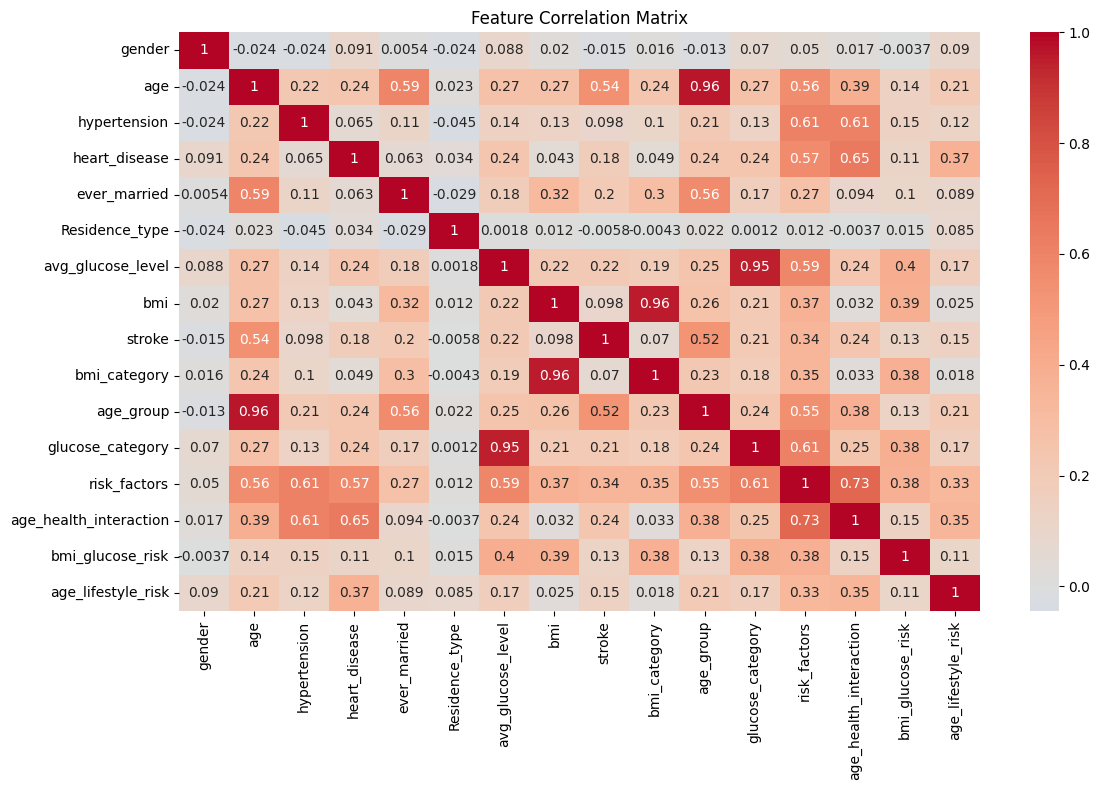

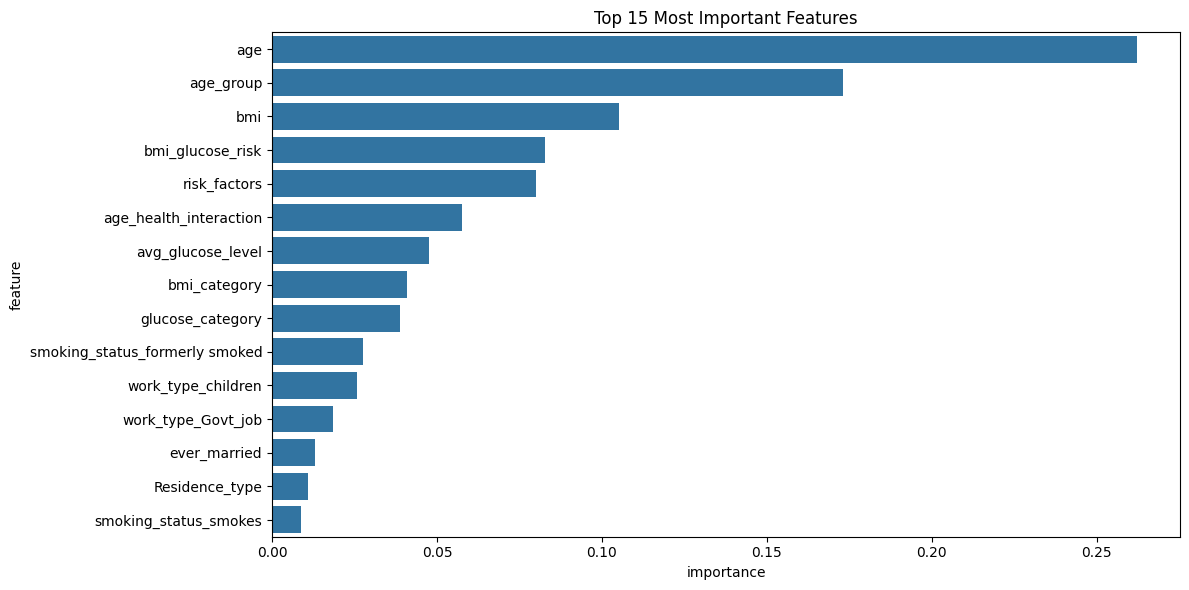


=== Feature Selection Results ===
Original features: 25
Features after correlation filtering: 22

Top 10 most important features retained:
                           feature  importance
1                              age    0.262158
7                              bmi    0.105073
22                bmi_glucose_risk    0.082610
20                    risk_factors    0.080024
21          age_health_interaction    0.057704
6                avg_glucose_level    0.047661
14  smoking_status_formerly smoked    0.027636
12              work_type_children    0.025613
8               work_type_Govt_job    0.018600
4                     ever_married    0.012913


In [14]:
# 3. Feature Analysis and Selection
print("\n=== Advanced Feature Analysis ===")

# 3.1 Correlation Analysis
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numeric_cols].corr()

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# 3.2 Advanced Feature Selection
X = df.drop(['stroke'], axis=1)
y = df['stroke']

# Using mutual information for feature selection
selector = SelectKBest(score_func=mutual_info_classif, k='all')
selector.fit(X, y)

# Create and sort feature importance dataframe
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': selector.scores_
}).sort_values('importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(12, 6))
sns.barplot(x='importance', y='feature', data=feature_importance.head(15))
plt.title('Top 15 Most Important Features')
plt.tight_layout()
plt.show()

# 3.3 Remove Highly Correlated Features
def remove_correlated_features(df, threshold=0.8):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return df.drop(to_drop, axis=1)

# Apply correlation filtering
df_filtered = remove_correlated_features(df.drop(['stroke'], axis=1))
df_final = pd.concat([df_filtered, df['stroke']], axis=1)

print("\n=== Feature Selection Results ===")
print(f"Original features: {df.shape[1]}")
print(f"Features after correlation filtering: {df_final.shape[1]}")
print("\nTop 10 most important features retained:")
print(feature_importance[feature_importance['feature'].isin(df_final.columns)].head(10))


In [15]:
# 4. Save Enhanced Dataset
print("\n=== Saving Final Dataset ===")
output_path = '../data/processed/stroke_data_final.csv'
df_final.to_csv(output_path, index=False)
print(f"Final enhanced dataset saved to: {output_path}")


=== Saving Final Dataset ===
Final enhanced dataset saved to: ../data/processed/stroke_data_final.csv


In [16]:
# 5. Summary Statistics
print("\n=== Final Summary ===")
print(f"1. Final number of features: {df_final.shape[1]-1}")
print(f"2. Samples: {df_final.shape[0]}")
print("3. Key improvements:")
print("   - Enhanced categorical features with more detailed grouping")
print("   - Removed highly correlated features")
print("   - Created complex interaction features")
print("   - Weighted risk factors")
print("4. Next steps recommendation:")
print("   - Use this dataset for model training")
print("   - Consider trying both with and without PCA")
print("   - Monitor feature importance in tree-based models")


=== Final Summary ===
1. Final number of features: 21
2. Samples: 1458
3. Key improvements:
   - Enhanced categorical features with more detailed grouping
   - Removed highly correlated features
   - Created complex interaction features
   - Weighted risk factors
4. Next steps recommendation:
   - Use this dataset for model training
   - Consider trying both with and without PCA
   - Monitor feature importance in tree-based models
